In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from catboost import CatBoostClassifier,Pool
from IPython.display import display
import matplotlib.patches as patch
import matplotlib.pyplot as plt
from sklearn.svm import NuSVR
from scipy.stats import norm
from sklearn import svm
import lightgbm as lgb
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import time
import glob
import sys
import os
import gc

In [2]:
fold_n=5
folds = StratifiedKFold(n_splits=fold_n, shuffle=True, random_state=10)
%matplotlib inline
%precision 4
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
pd.set_option("display.precision", 15)

In [3]:
dir_list = os.listdir("C://Users//mbma badie//Desktop//jupyter//Bank//dataset")
print(dir_list)

['sample_submission.csv', 'test.csv', 'train.csv']


In [4]:
%%time
train = pd.read_csv('dataset/train.csv')
test  = pd.read_csv('dataset/test.csv')
sample_submission = pd.read_csv('dataset/sample_submission.csv')
sample_submission.head()

Wall time: 7.92 s


,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [5]:
train.shape, test.shape, sample_submission.shape

((200000, 202), (200000, 201), (200000, 2))

In [6]:
train.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.925500000000000,-6.7863,11.908099999999999,5.0930,11.460699999999999,-9.283400000000000,5.1187,18.626600000000000,...,4.435400000000000,3.964200000000000,3.1364,1.691000000000000,18.522700000000000,-2.3978,7.8784,8.563499999999999,12.780300000000000,-1.091400000000000
1,train_1,0,11.500600000000000,-4.1473,13.858800000000000,5.3890,12.362200000000000,7.043300000000000,5.6208,16.533799999999999,...,7.642100000000000,7.721400000000000,2.5837,10.951599999999999,15.430500000000000,2.0339,8.1267,8.788900000000000,18.356000000000002,1.951800000000000
2,train_2,0,8.609299999999999,-2.7457,12.080500000000001,7.8928,10.582500000000000,-9.083700000000000,6.9427,14.615500000000001,...,2.905700000000000,9.790500000000000,1.6704,1.685800000000000,21.604199999999999,3.1417,-6.5213,8.267500000000000,14.722200000000001,0.396500000000000
3,train_3,0,11.060400000000000,-2.1518,8.952199999999999,7.1957,12.584600000000000,-1.836100000000000,5.8428,14.925000000000001,...,4.466600000000000,4.743300000000000,0.7178,1.421400000000000,23.034700000000001,-1.2706,-2.9275,10.292199999999999,17.969700000000000,-8.999599999999999
4,train_4,0,9.836900000000000,-1.4834,12.874599999999999,6.6375,12.277200000000001,2.448600000000000,5.9405,19.251400000000000,...,-1.490500000000000,9.521400000000000,-0.1508,9.194200000000000,13.287599999999999,-1.5121,3.9267,9.503100000000000,17.997399999999999,-8.810400000000000
5,train_5,0,11.476300000000000,-2.3182,12.608000000000001,8.6264,10.962100000000000,3.560900000000000,4.5322,15.225500000000000,...,-6.306800000000000,6.602500000000000,5.2912,0.440300000000000,14.945200000000000,1.0314,-3.6241,9.766999999999999,12.580900000000000,-4.760200000000000
6,train_6,0,11.809100000000001,-0.0832,9.349399999999999,4.2916,11.135500000000000,-8.019800000000000,6.1961,12.077100000000000,...,8.782999999999999,6.452100000000000,3.5325,0.177700000000000,18.331399999999999,0.5845,9.1104,9.114300000000000,10.886900000000001,-3.209700000000000
7,train_7,0,13.558000000000000,-7.9881,13.877599999999999,7.5985,8.654299999999999,0.831000000000000,5.6890,22.326200000000000,...,13.170000000000000,6.549100000000000,3.9906,5.806100000000000,23.140699999999999,-0.3776,4.2178,9.423700000000000,8.662400000000000,3.480600000000000
8,train_8,0,16.107099999999999,2.4426,13.930700000000000,5.6327,8.801399999999999,6.163000000000000,4.4514,10.185400000000000,...,1.429800000000000,14.750999999999999,1.6395,1.418100000000000,14.837000000000000,-1.9940,-1.0733,8.197500000000000,19.511399999999998,4.845300000000000
9,train_9,0,12.508800000000001,1.9743,8.896000000000001,5.4508,13.604300000000000,-16.285900000000002,6.0637,16.841000000000001,...,0.554300000000000,6.316000000000000,1.0371,3.688500000000000,14.834400000000000,0.4467,14.1287,7.913300000000000,16.237500000000001,14.251400000000000


In [7]:
train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [8]:
print(len(train.columns))

202


In [9]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
None


In [10]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,...,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000
mean,0.100490000000000,10.679914251999998,-1.627621689500000,10.715191851000002,6.796529157000000,11.078333240500001,-5.065317493500000,5.408948681500000,16.545849889499998,0.284161850000000,...,3.234439776000000,7.438408336999999,1.927838514000000,3.331773684499999,17.993784183000002,-0.142088433500000,2.303335243500000,8.908157683500001,15.870720248000000,-3.326536900500000
std,0.300652975806093,3.040050870668822,4.050044189954996,2.640894191799902,2.043319016359727,1.623149533936836,7.863266683476722,0.866607266216901,3.418075578937146,3.332633536717580,...,4.559921679910730,3.023271794723941,1.478422892336633,3.992030367901832,3.135161996426651,1.429372364408395,5.454369250069262,0.921625484493855,3.010945491221765,10.438015107352706
min,0.000000000000000,0.408400000000000,-15.043400000000000,2.117100000000000,-0.040200000000000,5.074800000000000,-32.562600000000003,2.347300000000000,5.349700000000000,-10.505500000000000,...,-14.093299999999999,-2.691700000000000,-3.814500000000000,-11.783400000000000,8.694400000000000,-5.261000000000000,-14.209600000000000,5.960600000000000,6.299300000000000,-38.852800000000002
25%,0.000000000000000,8.453850000000001,-4.740025000000000,8.722474999999999,5.254075000000000,9.883175000000001,-11.200350000000000,4.767700000000000,13.943800000000000,-2.317800000000000,...,-0.058825000000000,5.157400000000000,0.889775000000000,0.584600000000000,15.629799999999999,-1.170700000000000,-1.946925000000000,8.252800000000001,13.829700000000001,-11.208475000000000
50%,0.000000000000000,10.524750000000001,-1.608050000000000,10.580000000000000,6.825000000000000,11.108250000000000,-4.833150000000000,5.385100000000000,16.456800000000001,0.393700000000000,...,3.203600000000000,7.347750000000000,1.901300000000000,3.396350000000000,17.957949999999997,-0.172700000000000,2.408900000000000,8.888199999999999,15.934049999999999,-2.819550000000000
75%,0.000000000000000,12.758200000000000,1.358625000000000,12.516700000000000,8.324100000000000,12.261125000000000,0.924800000000000,6.003000000000000,19.102900000000002,2.937900000000000,...,6.406200000000000,9.512525000000000,2.949500000000000,6.205800000000000,20.396525000000000,0.829600000000000,6.556725000000000,9.593299999999999,18.064724999999999,4.836800000000000
max,1.000000000000000,20.315000000000001,10.376799999999999,19.353000000000002,13.188300000000000,16.671399999999998,17.251600000000000,8.447699999999999,27.691800000000001,10.151300000000001,...,18.440899999999999,16.716500000000000,8.402400000000000,18.281800000000000,27.928799999999999,4.272900000000000,18.321500000000000,12.000400000000001,26.079100000000000,28.500699999999998


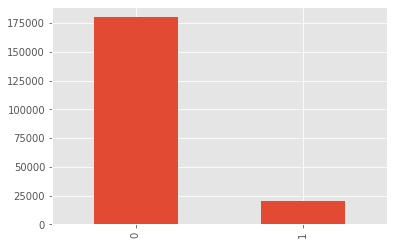

In [11]:
train['target'].value_counts().plot.bar();

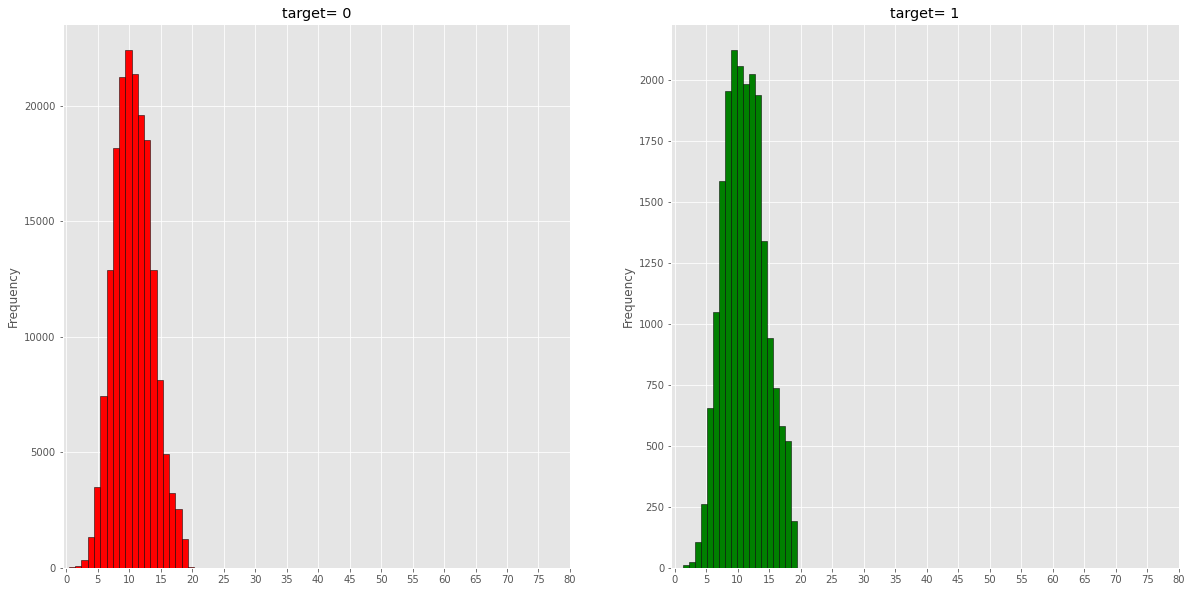

In [12]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['target']==0].var_0.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('target= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['target']==1].var_0.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('target= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

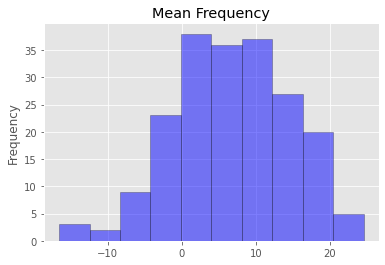

In [13]:
train[train.columns[2:]].mean().plot(color='blue',alpha=0.5, edgecolor='black', kind='hist');plt.title('Mean Frequency');

C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


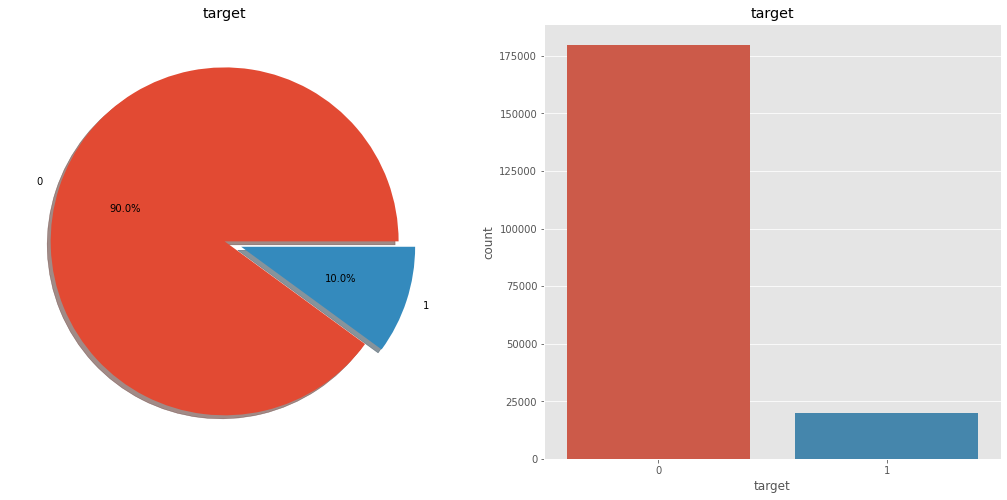

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target',data=train,ax=ax[1])
ax[1].set_title('target')
plt.show()

C:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


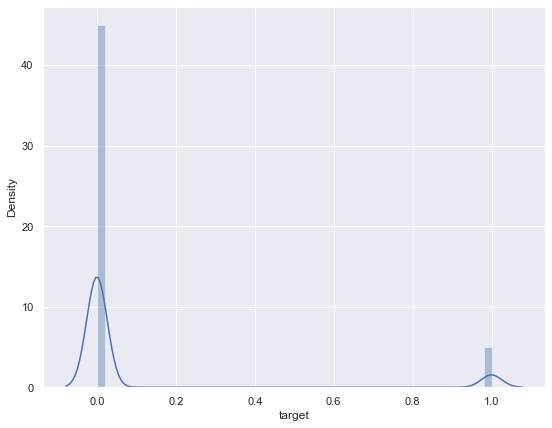

In [18]:
sns.set(rc={'figure.figsize':(9,7)})
sns.distplot(train['target']);

In [19]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [20]:
check_missing_data(train)


False

In [21]:
check_missing_data(test)

False

In [22]:
train['target'].unique()

array([0, 1], dtype=int64)

In [23]:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [24]:
def check_balance(df,target):
    check=[]
    print('size of data is:',df.shape[0] )
    for i in [0,1]:
        print('for target  {} ='.format(i))
        print(df[target].value_counts()[i]/df.shape[0]*100,'%')

In [25]:
check_balance(train,'target')

size of data is: 200000
for target  0 =
89.95100000000001 %
for target  1 =
10.049 %


In [26]:
print("Skewness: %f" % train['target'].skew())
print("Kurtosis: %f" % train['target'].kurt())

Skewness: 2.657642
Kurtosis: 5.063112


In [27]:
cols=["target","ID_code"]
X = train.drop(cols,axis=1)
y = train["target"]

In [28]:
X_test  = test.drop("ID_code",axis=1)

In [29]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
rfc_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [31]:
#Feature_importance
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfc_model, random_state=1).fit(val_X, val_y)

In [32]:
eli5.show_weights(perm, feature_names = val_X.columns.tolist(), top=150)

Weight,Feature
0.0000 ± 0.0000,var_99
0.0000 ± 0.0000,var_184
0.0000 ± 0.0000,var_174
0.0000 ± 0.0000,var_166
0.0000 ± 0.0000,var_154
0.0000 ± 0.0000,var_12
0.0000 ± 0.0000,var_133
0.0000 ± 0.0000,var_145
0.0000 ± 0.0000,var_140
0.0000 ± 0.0000,var_139


In [33]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

In [34]:
features = [c for c in train.columns if c not in ['ID_code', 'target']]

In [41]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


rfc_model.predict_proba(data_for_prediction_array);

C:\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [44]:
params = {'objective' : "binary", 
               'boost':"gbdt",
               'metric':"auc",
               'boost_from_average':"false",
               'num_threads':8,
               'learning_rate' : 0.01,
               'num_leaves' : 13,
               'max_depth':-1,
               'tree_learner' : "serial",
               'feature_fraction' : 0.05,
               'bagging_freq' : 5,
               'bagging_fraction' : 0.4,
               'min_data_in_leaf' : 80,
               'min_sum_hessian_in_leaf' : 10.0,
               'verbosity' : 1}

In [45]:
#lightgbm
%%time
y_pred_lgb = np.zeros(len(X_test))
num_round = 1000000
for fold_n, (train_index, valid_index) in enumerate(folds.split(X,y)):
    print('Fold', fold_n, 'started at', time.ctime())
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_valid, label=y_valid)
        
    lgb_model = lgb.train(params,train_data,num_round,#change 20 to 2000
                    valid_sets = [train_data, valid_data],verbose_eval=1000,early_stopping_rounds = 3500)##change 10 to 200
            
    y_pred_lgb += lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)/5

Fold 0 started at Sat Dec 25 17:15:03 2021


C:\Python\Python310\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python\Python310\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 16079, number of negative: 143921
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 200
Training until validation scores don't improve for 3500 rounds
[1000]	training's auc: 0.889373	valid_1's auc: 0.869465
[2000]	training's auc: 0.907674	valid_1's auc: 0.883952
[3000]	training's auc: 0.918192	valid_1's auc: 0.890539
[4000]	training's auc: 0.925602	valid_1's auc: 0.894166
[5000]	training's auc: 0.931453	valid_1's auc: 0.896144
[6000]	training's auc: 0.936545	valid_1's auc: 0.897452
[7000]	training's auc: 0.941064	valid_1's auc: 0.898251
[8000]	training's auc: 0.945207	valid_1's auc: 0.898635
[9000]	training's auc: 0.949133	valid_1's auc: 0.899024
[10000]	training's auc: 0.952701	valid_1's auc: 0.899285
[11000]	t

In [52]:
#Random_Forest
y_pred_rfc = rfc_model.predict(X_test)
rfc_acc = rfc_model.score(train_X,train_y)
print(rfc_acc)

0.9999866666666667


In [47]:
#Decision_Tree
y_pred_tree = tree_model.predict(X_test)

In [48]:
#Cat_Boost
train_pool = Pool(train_X,train_y)
cat_model = CatBoostClassifier(
                               iterations=3000,# change 25 to 3000 to get best performance 
                               learning_rate=0.03,
                               objective="Logloss",
                               eval_metric='AUC',
                              )
cat_model.fit(train_X,train_y,silent=True)
y_pred_cat = cat_model.predict(X_test)